# Домашнее задание №11. Метод опорных векторов

В этом задании вам необходимо поработать со следующим датасетом: https://archive.ics.uci.edu/dataset/45/heart+disease

Целевой столбец -- наличие или отсутствие сердечных заболеваний. Необходимо провести классификацию на два класса методом опорных векторов и вывести матрицу ошибок.

Данные необходимо обработать аналогично тому, как это делалось на семинаре. При подборе оптимальных параметров обучения необходимо использовать кросс-валидацию.

In [ ]:
# Напишите свой код в данной ячейке
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

cleveland_df = pd.read_csv('processed.cleveland.data', header=None, na_values = ["?", -9.0])
switzerland_df = pd.read_csv('processed.switzerland.data', header=None, na_values = ["?", -9.0])
va_df = pd.read_csv('processed.va.data', header=None, na_values = ["?", -9.0])
hungarian_df = pd.read_csv('processed.hungarian.data', header=None, na_values = ["?", -9.0])

cleveland_df["source"] = "cleveland"
switzerland_df["source"] = "switzerland"
va_df["source"] = "va"
hungarian_df["source"] = "hungarian"
headers = {
    0: "age",
    1: "sex",
    2: "cp",
    3: "trestbps",
    4: "chol",
    5: "fbs",
    6: "restecg",
    7: "thalach",
    8: "exang",
    9: "oldpeak",
    10: "slope",
    11: "ca",
    12: "thal",
    13: "diagnosis"
}

cleveland_df = cleveland_df.rename(columns = headers)
switzerland_df = switzerland_df.rename(columns = headers)
va_df = va_df.rename(columns = headers)
hungarian_df = hungarian_df.rename(columns = headers)

pd_list = [cleveland_df, switzerland_df, va_df, hungarian_df]
df = pd.concat(pd_list)
df.replace({'diagnosis':{2:1, 3:1, 4:1}}, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


In [ ]:
X = df.drop('diagnosis', axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,cleveland


In [ ]:
y = df['diagnosis'].copy()
y.head()

,diagnosis
0,0
1,1
2,1
3,0
4,0


In [ ]:
df.shape[0]
pd.get_dummies(X, columns=['source']).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,source_cleveland,source_hungarian,source_switzerland,source_va
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,True,False,False,False
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,True,False,False,False
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,True,False,False,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,True,False,False,False


In [ ]:
X_encoded = pd.get_dummies(X, columns=['sex',
                                       'cp',
                                       'trestbps',
                                       'chol',
                                       'fbs',
                                       'restecg',
                                       'thalach',
                                       'exang',
                                       'oldpeak',
                                       'slope',
                                       'ca',
                                       'thal',
                                       'source'])
X_encoded.head()

,age,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,trestbps_0.0,trestbps_80.0,trestbps_92.0,...,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,source_cleveland,source_hungarian,source_switzerland,source_va
0,63.0,False,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,67.0,False,True,False,False,False,True,False,False,False,...,False,False,True,True,False,False,True,False,False,False
2,67.0,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
3,37.0,False,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,41.0,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

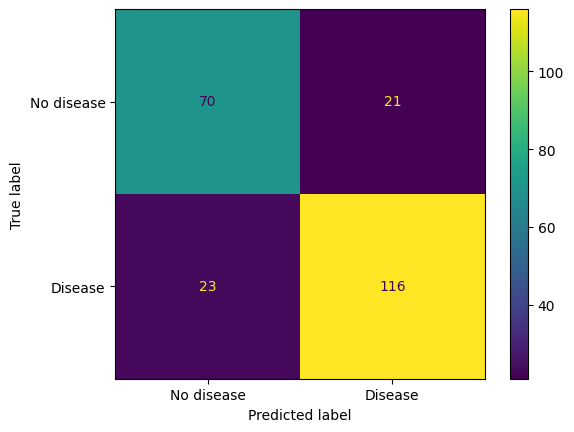

In [ ]:
y_pred = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No disease", "Disease"])
disp.plot(values_format='d')

In [ ]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
#    scoring='accuracy',  # (по умолчанию) C=1, gamma=0.001
#     scoring='balanced_accuracy',  # C=1, gamma=0.001
#     scoring='f1',  # C=1, gamma=0.001
#     scoring='f1_micro', # C=1, gamma=0.001
#     scoring='f1_macro',  # C=1, gamma=0.001
#     scoring='f1_weighted',  # C=1, gamma=0.001
#     scoring='roc_auc',  # Не трогать этот вариант... C=0.5, gamma=0.0001
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}


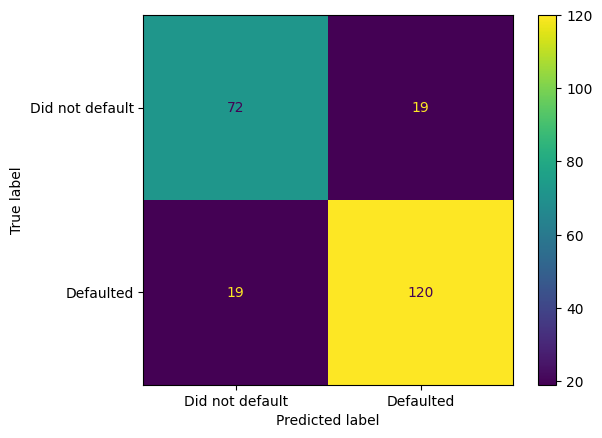

In [ ]:
clf_svm = SVC(random_state=42, C=0.5, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)
y_pred = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not default", "Defaulted"])
disp.plot(values_format='d')